# Social Network Ads using ( Binomial ) Logistic Regression

# Import Necesssary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import scorer

# Load the data

In [2]:
data=pd.read_csv('Social_Network_Ads.csv')

### first 5 rows

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### shape of data

In [4]:
data.shape

(400, 5)

# Visualisation of all numerical Columns

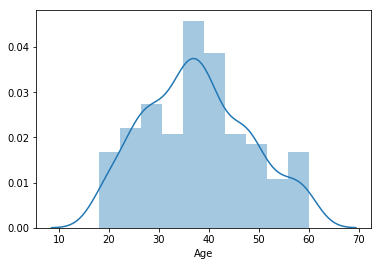

In [5]:
sns.distplot(data['Age'])

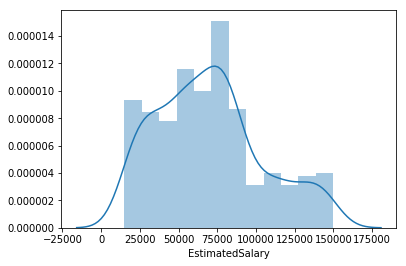

In [7]:
sns.distplot(data['EstimatedSalary'])

## split the data into independent and dependent  value

In [8]:
X=np.asarray(data[['Age','EstimatedSalary']])
Y=np.asarray(data['Purchased'])

## Normalize the dataset

In [9]:
X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059]])

# Train/Test data

In [11]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=40)

# Make Model

In [12]:
LR=LogisticRegression(solver='liblinear').fit(train_x,train_y)

In [13]:
pred=LR.predict(test_x)
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [15]:
pred_prob=LR.predict_proba(test_x)
pred_prob

array([[0.89777273, 0.10222727],
       [0.50533102, 0.49466898],
       [0.53652724, 0.46347276],
       [0.97694661, 0.02305339],
       [0.71510381, 0.28489619],
       [0.5737222 , 0.4262778 ],
       [0.32137057, 0.67862943],
       [0.61141436, 0.38858564],
       [0.01641663, 0.98358337],
       [0.16020359, 0.83979641],
       [0.64049564, 0.35950436],
       [0.79275103, 0.20724897],
       [0.81164204, 0.18835796],
       [0.12600193, 0.87399807],
       [0.83283811, 0.16716189],
       [0.66305124, 0.33694876],
       [0.98801073, 0.01198927],
       [0.71405795, 0.28594205],
       [0.85732482, 0.14267518],
       [0.62731473, 0.37268527],
       [0.58257289, 0.41742711],
       [0.99484861, 0.00515139],
       [0.08985039, 0.91014961],
       [0.88682573, 0.11317427],
       [0.98806666, 0.01193334],
       [0.98731394, 0.01268606],
       [0.49103294, 0.50896706],
       [0.99229848, 0.00770152],
       [0.57497582, 0.42502418],
       [0.35878944, 0.64121056],
       [0.

# Evaluation

### 1)Score

In [18]:
LR.score(test_x,test_y)

0.8375

### 2) Jaccard similarity score

In [19]:
jaccard_similarity_score(test_y,pred)

/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8375

### 3) classification report

In [20]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        56
           1       0.87      0.54      0.67        24

    accuracy                           0.84        80
   macro avg       0.85      0.75      0.78        80
weighted avg       0.84      0.84      0.82        80



### 4) confusion metrics

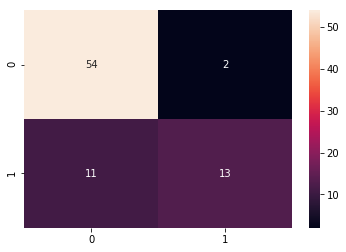

In [23]:
cm=confusion_matrix(test_y,pred)
sns.heatmap(cm,annot=True)
plt.show()

### 5) log loss method

In [25]:
log_loss(test_y,pred_prob)

0.349349977573195

## Viualisation of training data

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


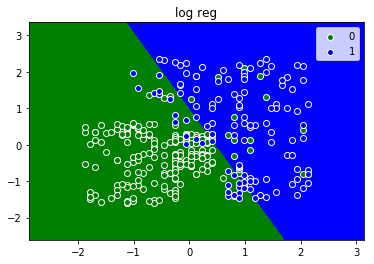

In [28]:
from matplotlib.colors import ListedColormap
X,Y=np.meshgrid(np.arange(start=train_x[:,0].min()-1,stop=train_x[:,0].max()+1,step=0.01),np.arange(start=train_x[:,1].min()-1,stop=train_x[:,1].max()+1,step=0.01))

pb=LR.predict(np.array([X.ravel(),Y.ravel()]).T).reshape(X.shape)

plt.contourf(X,Y,pb,cmap=ListedColormap(('green','blue')))

plt.xlim(X.min(),X.max())

plt.ylim(Y.min(),Y.max())

for i,j in enumerate(np.unique(train_y)):
    plt.scatter(train_x[train_y==j,0],train_x[train_y==j,1],c=ListedColormap(('green','blue'))(i),label=j,edgecolor='white')
plt.title('log reg')
plt.legend()
plt.show()

## Visualisation of testing data

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


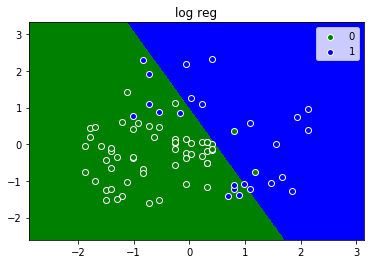

In [29]:
from matplotlib.colors import ListedColormap
X,Y=np.meshgrid(np.arange(start=test_x[:,0].min()-1,stop=test_x[:,0].max()+1,step=0.01),np.arange(start=test_x[:,1].min()-1,stop=test_x[:,1].max()+1,step=0.01))

pb=LR.predict(np.array([X.ravel(),Y.ravel()]).T).reshape(X.shape)

plt.contourf(X,Y,pb,cmap=ListedColormap(('green','blue')))

plt.xlim(X.min(),X.max())

plt.ylim(Y.min(),Y.max())

for i,j in enumerate(np.unique(test_y)):
    plt.scatter(test_x[test_y==j,0],test_x[test_y==j,1],c=ListedColormap(('green','blue'))(i),label=j,edgecolor='white')
plt.title('log reg')
plt.legend()
plt.show()